# 10. 量子隐形传态

接下来讲到的量子隐形传态需要用到贝尔态，让我们回顾一下，总共有四种贝尔态：
$$
\begin{align*}
|B_{00}\rangle & = \frac{|00\rangle + |11\rangle}{\sqrt{2}} \\
|B_{01}\rangle & = \frac{|01\rangle + |10\rangle}{\sqrt{2}} \\
|B_{10}\rangle & = \frac{|00\rangle - |11\rangle}{\sqrt{2}} \\
|B_{11}\rangle & = \frac{|01\rangle - |10\rangle}{\sqrt{2}} \\
\end{align*}
$$
它们够成了两量子比特的一组基，同时它们都是最大纠缠态。

想要生成贝尔态，我们可以使用 H 和 CNOT 来实现：

$$U_{CNOT}(H \otimes I) \left| 00 \right > = \frac{1}{\sqrt{2}} U_{CNOT} ( \left| 0 \right> + \left|1\right>) \left|0\right> = \frac{1}{\sqrt{2}} (\left|00\right> + \left|11\right>)$$

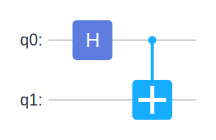

√2/2¦00⟩
√2/2¦11⟩


In [1]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import H, CNOT
from mindquantum.simulator import Simulator
import numpy as np
from IPython.display import display_svg

circ = Circuit()
circ += H.on(0)
circ += CNOT.on(1, 0)
display_svg(circ.svg())

sim = Simulator("mqvector", 2)
sim.set_qs(np.array([1, 0, 0, 0])) # set state to |00>
sim.apply_circuit(circ)
print(sim.get_qs(True))

# 量子隐形传态

![quantum-teleportation](./images/quantum_teleportation.png)

量子隐形传态的目的是将Alice手上的一个量子比特 $|\psi\rangle$ 传送给Bob。由于量子不可克隆原理，事实上将摧毁A点的量子态，然后在B点重新生成。AB两点之间没有物质传送，但是共享一对贝尔态 $|B_{00}\rangle$，可以传送经典信息（利用电磁波等）。

下面将一步步推导量子隐形传态的过程：

0. 初始态如下所示：
   $$|\psi_0\rangle = |\psi\rangle |B_{00}\rangle = \frac{1}{\sqrt{2}}\left(\alpha|0\rangle + \beta|1\rangle\right) \left( |0_A\rangle |0_B\rangle + |1_A\rangle |1_B\rangle \right)$$
1. Alice对她拥有的两个量子比特作用CNOT：
   $$|\psi_1\rangle = \alpha |0_A\rangle \frac{|0_A\rangle |0_B\rangle + |1_A\rangle |1_B\rangle}{\sqrt{2}} + \beta |1_A\rangle \frac{|1_A\rangle |0_B\rangle + |0_A\rangle |1_B\rangle}{\sqrt{2}}$$
2. Alice对她拥有的第一个量子比特作用 H：
   $$\begin{align*} |\psi_2\rangle  & = \alpha \frac{|0_A\rangle + |1_A\rangle}{\sqrt{2}} \frac{|0_A\rangle |0_B\rangle + |1_A\rangle |1_B\rangle}{\sqrt{2}}  + \beta \frac{|0_A\rangle - |1_A\rangle}{\sqrt{2}} \frac{|1_A\rangle |0_B\rangle + |0_A\rangle |1_B\rangle}{\sqrt{2}} \\ & = \frac{1}{2} |0_A 0_A\rangle \left( \alpha |0_B\rangle + \beta |1_B\rangle \right)  + \frac{1}{2} |0_A 1_A\rangle \left( \alpha |1_B\rangle + \beta |0_B\rangle \right) \\ & + \frac{1}{2} |1_A 0_A\rangle \left( \alpha |0_B\rangle - \beta |1_B\rangle \right)  + \frac{1}{2} |1_A 1_A\rangle \left( \alpha |1_B\rangle - \beta |0_B\rangle \right) \end{align*}$$
3. Alice测量她手上的两个量子比特：
   
   0. 如果测量结果是“00”，那么Bob手上的量子比特就是 $|\psi\rangle$；
   1. 如果测量结果是“01”，那么Bob对他手上的量子比特作用 X 门就得到了 $|\psi\rangle$；
   2. 如果测量结果是“10”，那么Bob需要作用 Z 门；
   3. 如果测量结果是“11”，那么Bob需要先作用 X 门，再作用 Z 门。


![quantum-teleportation-circuit](./images/quantum_teleportation_circuit.png)

psi = [0.17310966 0.98490256]


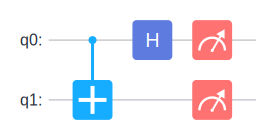

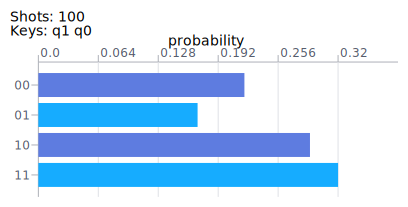

shots: 1
Keys: q1 q0│0.00     0.2         0.4         0.6         0.8         1.0
───────────┼───────────┴───────────┴───────────┴───────────┴───────────┴
         11│▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
           │
{'11': 1}
0.17310966¦011⟩
0.98490256¦111⟩


/var/folders/ms/k8tkmh4n6199kmzjr0z3nlhh0000gn/T/ipykernel_52586/3216541378.py:31: UserWarning: The variable `MeasureResult.samples` has been unified to little-endian order in version 0.10, which means the columns of the samples array have been reversed from the previous big-endian format. If you used this variable in version 0.9, please review and adjust your code carefully.
  if res.samples[0][res.keys_map['q1']] == 1:
/var/folders/ms/k8tkmh4n6199kmzjr0z3nlhh0000gn/T/ipykernel_52586/3216541378.py:34: UserWarning: The variable `MeasureResult.samples` has been unified to little-endian order in version 0.10, which means the columns of the samples array have been reversed from the previous big-endian format. If you used this variable in version 0.9, please review and adjust your code carefully.
  if res.samples[0][res.keys_map['q0']] == 1:


In [2]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import H, CNOT, Measure, X, Z, BARRIER
from mindquantum.simulator import Simulator
from IPython.display import display_svg
import numpy as np

psi = np.random.rand(2)
psi = psi / np.linalg.norm(psi)
print(f"psi = {psi}")
bell = np.array([1, 0, 0, 1]) / np.sqrt(2)
init = np.kron(bell, psi)

sim = Simulator("mqvector", 3)
sim.set_qs(init)

circ = Circuit()
circ += CNOT.on(1, 0)
circ += H.on(0)
circ += BARRIER
circ += Measure("q0").on(0)
circ += Measure("q1").on(1)
display_svg(circ.svg())

res = sim.sampling(circuit=circ, shots=100)
display_svg(res.svg())

res = sim.apply_circuit(circ)
print(res)

# if measurement of q1 is 1, then apply X
if res.samples[0][res.keys_map['q1']] == 1:
    sim.apply_gate(X.on(2))
# if measurement of q2 is 1, then apply Z
if res.samples[0][res.keys_map['q0']] == 1:
    sim.apply_gate(Z.on(2))

print(sim.get_qs(True))

In [3]:
from show_info import InfoTable

InfoTable('mindquantum', 'numpy')

# 习题

## Exercise 1

请验证下面的线路对于所有可能的输入 $q_0 = x, q_1 = y$ 能够生成对应的 $B_{xy}$ 。

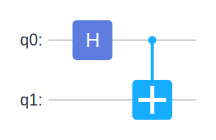

In [4]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import H, CNOT
from mindquantum.simulator import Simulator
import numpy as np
from IPython.display import display_svg

circ = Circuit()
circ += H.on(0)
circ += CNOT.on(1, 0)
display_svg(circ.svg())